In [12]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt

In [13]:
csv_opts = {'sep': '|',
           'quotechar': '"',
           'compression': 'gzip',
           'encoding': 'utf-8'}

In [14]:
with open('../hand/arrest_dtypes.yaml', 'r') as yamlfile:
        arrest_dtypes = yaml.load(yamlfile)
with open('../hand/encounter_dtypes.yaml', 'r') as yamlfile:
        encounter_dtypes = yaml.load(yamlfile)
with open('../hand/removal_dtypes.yaml', 'r') as yamlfile:
        removal_dtypes = yaml.load(yamlfile)

In [15]:
arrests = pd.read_csv('../input/arrests.csv.gz', **csv_opts, dtype=arrest_dtypes)
encounters = pd.read_csv('../input/encounters.csv.gz', **csv_opts, dtype=encounter_dtypes)
removals = pd.read_csv('../input/removals.csv.gz', **csv_opts, dtype=removal_dtypes)

In [16]:
arrests['apprehension_date'] = pd.to_datetime(arrests['apprehension_date'], format='%m/%d/%Y')
encounters['event_date'] = pd.to_datetime(encounters['event_date'], format='%m/%d/%Y')
removals['departed_date'] = pd.to_datetime(removals['departed_date'], format='%m/%d/%Y')
removals['removal_date'] = pd.to_datetime(removals['removal_date'], format='%m/%d/%Y')

In [17]:
encounters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689378 entries, 0 to 1689377
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   aor                     1608957 non-null  category      
 1   event_date              1689378 non-null  datetime64[ns]
 2   landmark                1029394 non-null  category      
 3   operation               298737 non-null   category      
 4   processing_disposition  1686035 non-null  category      
 5   citizenship             1689378 non-null  category      
 6   gender                  1689360 non-null  category      
 7   id                      1689378 non-null  int64         
dtypes: category(6), datetime64[ns](1), int64(1)
memory usage: 39.1 MB


In [18]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544059 entries, 0 to 544058
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   aor                     540251 non-null  category      
 1   apprehension_date       544059 non-null  datetime64[ns]
 2   apprehension_method     544059 non-null  category      
 3   apprehension_landmark   529216 non-null  category      
 4   operation               117368 non-null  category      
 5   processing_disposition  543865 non-null  category      
 6   citizenship             544059 non-null  category      
 7   gender                  544059 non-null  category      
 8   id                      544059 non-null  int64         
dtypes: category(7), datetime64[ns](1), int64(1)
memory usage: 13.4 MB


In [19]:
removals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963972 entries, 0 to 963971
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   aor                          963972 non-null  category      
 1   apprehension_date            949737 non-null  object        
 2   processing_disposition_code  958257 non-null  category      
 3   citizenship                  963972 non-null  category      
 4   gender                       963972 non-null  category      
 5   rc_threat_level              542478 non-null  object        
 6   final_charge_section         962328 non-null  category      
 7   departed_date                963972 non-null  datetime64[ns]
 8   removal_date                 963972 non-null  datetime64[ns]
 9   id                           963972 non-null  int64         
dtypes: category(5), datetime64[ns](2), int64(1), object(2)
memory usage: 42.3+ MB


In [20]:
len(set(encounters.landmark.str.upper()))

8253

In [31]:
temp1 = encounters[['aor', 'landmark']].drop_duplicates(keep='first')

In [32]:
temp2 = arrests[['aor', 'apprehension_landmark']].drop_duplicates(keep='first')

In [37]:
temp2 = temp2.rename({'apprehension_landmark': 'landmark'}, axis=1)

In [40]:
aor_landmarks = pd.concat([temp1, temp2]).drop_duplicates(keep='first')

In [41]:
len(aor_landmarks)

12076

In [48]:
len(aor_landmarks.dropna(how='all'))

12075

In [21]:
len(set(arrests.apprehension_landmark.str.upper()))

7280

In [22]:
len(set(arrests.apprehension_landmark.str.upper()).union(set(encounters.landmark.str.upper())))

8961

In [23]:
sum(pd.isnull(arrests.apprehension_landmark)) / len(arrests) * 100

2.7281967580721944

In [24]:
sum(pd.isnull(encounters.landmark)) / len(encounters) * 100

39.06668608209649

Using date range of AIC report, numbers very close, difference either due to cleaning decisions or possibly records "back-filled" posterior to date of release to AIC.

In [13]:
aic_start = '2016-1-1'
aic_end = '2018-9-23'
print(len(arrests.set_index('apprehension_date').loc[aic_start: aic_end]))
print(len(encounters.set_index('event_date').loc[aic_start: aic_end]))
print(len(removals.set_index('removal_date').loc[aic_start: aic_end]))
print(len(removals.set_index('departed_date').loc[aic_start: aic_end]))

381705
1199704
656077
657686


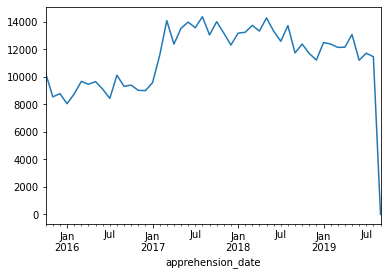

In [14]:
arrests.set_index('apprehension_date').resample('M')['id'].count().plot()

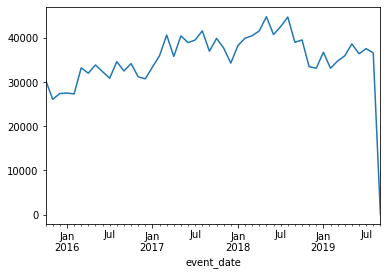

In [15]:
encounters.set_index('event_date').resample('M')['id'].count().plot()

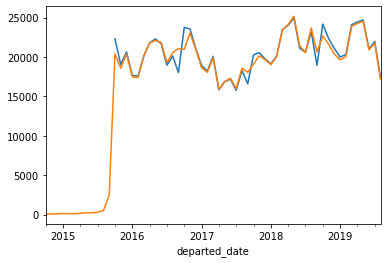

In [16]:
# Relationship between `removal_date` and `departed_date`. Strange.
removals.set_index('removal_date').resample('M')['id'].count().plot()
removals.set_index('departed_date').resample('M')['id'].count().plot()

In [17]:
facil_adp = pd.read_csv('../input/facility_adp_by_fy.csv', index_col=0)

In [18]:
facil_adp.tail()

,ATL,BAL,BOS,BUF,CHI,DAL,DEN,DET,ELP,HOU,...,NYC,PHI,PHO,SEA,SFR,SLC,SNA,SND,SPM,WAS
fy14_adp,2156,299,580,538,1481,1002,491,537,2167,3873,...,991,1042,3317,1520,743,484,6972,1158,440,784
fy15_adp,1798,247,418,454,1116,795,426,346,2011,2324,...,962,894,2868,1248,687,415,6163,1370,311,715
fy16_adp,2110,264,555,608,1436,921,493,529,2469,3269,...,1393,1019,4006,1540,969,556,7940,1610,432,763
fy17_adp,3232,289,670,641,1602,979,721,850,3094,3248,...,1501,1083,3724,1574,961,506,7212,1789,660,883
fy18_adp,3501,326,768,633,1625,1153,649,1116,2561,2674,...,1707,1088,3715,1531,1048,485,8407,1787,803,899


In [19]:
t = ['2008-10-01',
'2009-10-01',
'2010-10-01',
'2011-10-01',
'2012-10-01',
'2013-10-01',
'2014-10-01',
'2015-10-01',
'2016-10-01',
'2017-10-01']

In [20]:
facil_adp.index = t
facil_adp.index = pd.to_datetime(facil_adp.index)

In [21]:
# Percent change in ADP FY16-FY17, FY17-18
aor_facil_change_16_17 = (facil_adp.T['2016-10-01'] - facil_adp.T['2015-10-01']) / facil_adp.T['2015-10-01'] * 100
aor_facil_change_17_18 = (facil_adp.T['2017-10-01'] - facil_adp.T['2016-10-01']) / facil_adp.T['2016-10-01'] * 100

In [22]:
# Total ADP % change FY16-FY18
total_facil_change = (facil_adp.T['2017-10-01'].sum() - facil_adp.T['2015-10-01'].sum()) / facil_adp.T['2015-10-01'].sum() * 100
total_facil_change

10.04292898319637

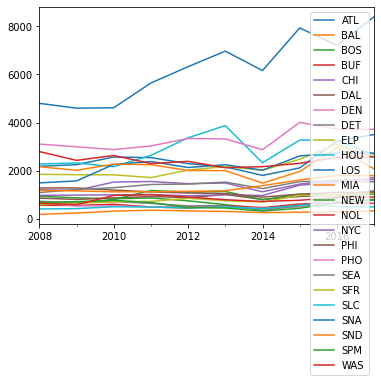

In [24]:
facil_adp.plot(stacked=False, legend=True)

In [25]:
facil_adp.mean().sort_values(ascending=False)

SNA    6267.6
PHO    3295.5
HOU    2813.9
ATL    2461.0
NOL    2422.3
LOS    2213.7
ELP    2152.0
MIA    2116.1
CHI    1415.3
SEA    1385.2
SND    1340.8
NYC    1143.8
PHI    1104.2
NEW     921.0
DAL     914.9
WAS     811.6
SFR     788.0
BOS     720.6
DET     662.8
SPM     591.7
BUF     549.3
DEN     547.7
SLC     468.1
BAL     281.2
dtype: float64

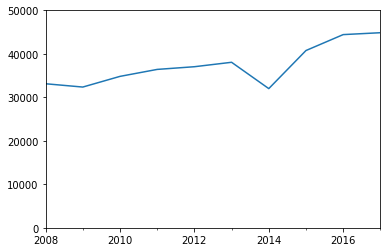

In [26]:
facil_adp.T.sum().plot(ylim=(0,50000))

In [27]:
facil_adp_subset = facil_adp.loc['2015':'2017']

In [28]:
arrests_by_aor_fy = arrests.set_index('apprehension_date').groupby([pd.Grouper(freq='AS-OCT'), 'aor'])['id'].count()

In [29]:
arrests_by_aor_fy = arrests_by_aor_fy.unstack()

In [30]:
arrests_by_aor_fy_subset = arrests_by_aor_fy.loc['2015':'2017']

In [31]:
facil_adp_subset.index = ['FY16 ADP',
                          'FY17 ADP',
                          'FY18 ADP']

In [32]:
arrests_by_aor_fy_subset.index = ['FY16 Arrests',
                          'FY17 Arrests',
                          'FY18 Arrests']

In [33]:
data = facil_adp_subset.T.join(arrests_by_aor_fy_subset.T)

In [34]:
fys = ['FY16',
       'FY17',
       'FY18']

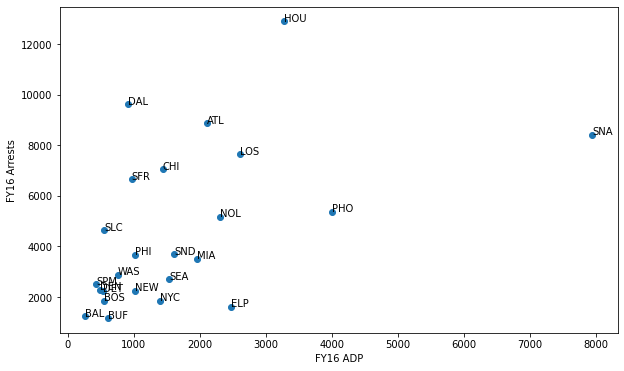

In [35]:
x=f'FY16 ADP'
y=f'FY16 Arrests'

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=x, y=y, data=data)
plt.xlabel(x)
plt.ylabel(y)

for i, txt in enumerate(data.index):
    plt.annotate(txt, (data[x][i], data[y][i]))

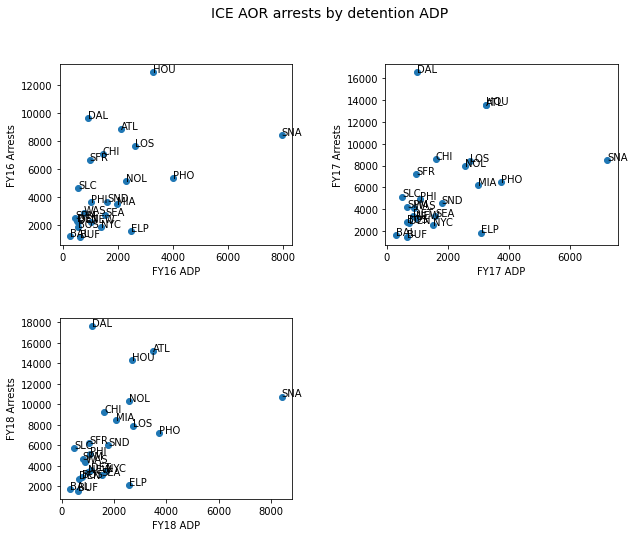

In [39]:
fig = plt.figure(figsize=(10,8))
i = 0

for fy in fys:
    x=f'{fy} ADP'
    y=f'{fy} Arrests'

    ax=plt.subplot(2,2,i+1)
    ax.scatter(x=x, y=y, data=data)
    plt.xlabel(x)
    plt.ylabel(y)
#     plt.ylim(-100, 20000)
#     plt.xlim(-100, 10000)

    i = i+1
    for j, txt in enumerate(data.index):
        plt.annotate(txt, (data[x][j], data[y][j]))

plt.suptitle(f'ICE AOR arrests by detention ADP', fontsize=14)
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.show;

In [40]:
aor_arrest_change_16_17 = (arrests_by_aor_fy.T['2016-10-01'] - arrests_by_aor_fy.T['2015-10-01']) / arrests_by_aor_fy.T['2015-10-01'] * 100
aor_arrest_change_17_18 = (arrests_by_aor_fy.T['2017-10-01'] - arrests_by_aor_fy.T['2016-10-01']) / arrests_by_aor_fy.T['2016-10-01'] * 100

In [41]:
aor_arrest_change_16_17 = aor_arrest_change_16_17.drop('HQ')
aor_arrest_change_17_18 = aor_arrest_change_17_18.drop('HQ')

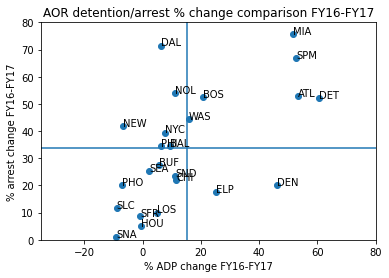

In [42]:
txt = list(aor_arrest_change_16_17.index)
x = list(aor_facil_change_16_17)
y = list(aor_arrest_change_16_17)
names = list(aor_arrest_change_16_17.index)

plt.scatter(x=x, y=y)
plt.xlabel('% ADP change FY16-FY17')
plt.ylabel('% arrest change FY16-FY17')
plt.title('AOR detention/arrest % change comparison FY16-FY17')
plt.axhline(aor_arrest_change_16_17.mean())
plt.axvline(aor_facil_change_16_17.mean())
plt.ylim(-0, 80)
plt.xlim(-35, 80)

for i, txt in enumerate(names):
    plt.annotate(txt, (x[i], y[i]))

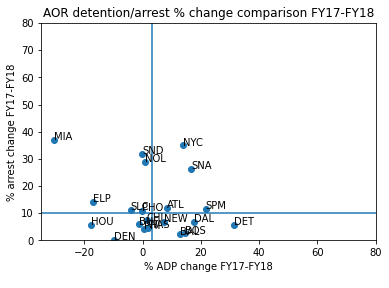

In [43]:
txt = list(aor_arrest_change_17_18.index)
x = list(aor_facil_change_17_18)
y = list(aor_arrest_change_17_18)
names = list(aor_arrest_change_17_18.index)

plt.scatter(x=x, y=y)
plt.xlabel('% ADP change FY17-FY18')
plt.ylabel('% arrest change FY17-FY18')
plt.title('AOR detention/arrest % change comparison FY17-FY18')
plt.axhline(aor_arrest_change_17_18.mean())
plt.axvline(aor_facil_change_17_18.mean())
plt.ylim(-0, 80)
plt.xlim(-35, 80)

for i, txt in enumerate(names):
    plt.annotate(txt, (x[i], y[i]))

In [46]:
removals.columns

Index(['aor', 'apprehension_date', 'processing_disposition_code',
       'citizenship', 'gender', 'rc_threat_level', 'final_charge_section',
       'departed_date', 'removal_date', 'id'],
      dtype='object')

In [47]:
removals['removal_date'] = pd.to_datetime(removals['removal_date'])

# removals['apprehension_date'] = pd.to_datetime(removals['apprehension_date'])
# removals['departed_date'] = pd.to_datetime(removals['departed_date'])

In [48]:
g = removals.set_index('removal_date').groupby([pd.Grouper(freq='AS-OCT'), 'citizenship'])

In [49]:
data = g['id'].count().unstack()

In [50]:
data_change = (data.T['2017-10-01'] - data.T['2015-10-01']) / data.T['2015-10-01'] * 100

In [51]:
data_change = data_change.replace([np.inf, -np.inf], np.nan)
data_change = data_change.dropna()

In [52]:
data_change.sort_values()

citizenship
SWAZILAND         -100.00
SEYCHELLES        -100.00
CAYMAN ISLANDS    -100.00
ANGUILLA          -100.00
OMAN              -100.00
                   ...   
GUINEA            1268.75
AZERBAIJAN        1300.00
SUDAN             1300.00
GAMBIA            5450.00
SOUTH SUDAN       6000.00
Length: 186, dtype: float64

In [53]:
data_change.loc['SOMALIA']

15.656565656565657